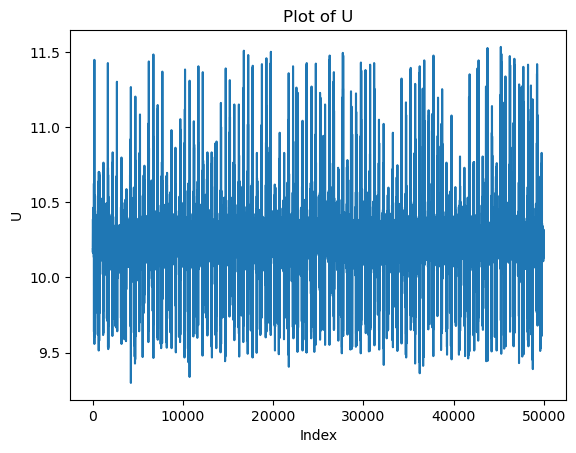

In [21]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft
import pandas as pd

filepath = "Measurement\Data\Points\it=4_X=0_Y=0_P=59,30.csv"
df = pd.read_csv(filepath)
V = df.iloc[:, 1].values

coefficients = np.loadtxt('polynomial_coefficients.txt')
u = np.polyval(coefficients, V)

n =  np.shape(u)[0]
nblock = 1

dt = df.iloc[1, 0] - df.iloc[0, 0]
fs = 1 / dt

plt.plot(u)
plt.title('Plot of U')
plt.xlabel('Index')
plt.ylabel('U')
plt.show()


In [22]:
figure_size = (6,4)

**Means over all the blocks**

In [23]:
all_means = np.mean(u[:,:],axis=0)
plt.figure(figsize=figure_size)  # Set the size of the graph
plt.plot(all_means)
plt.title('Mean Values of u')
plt.xlabel('Block Number')
plt.ylabel('Mean Value')
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
uf = u - u.mean() # fluctuation part
all_autocorr = np.zeros((n, nblock))



for i in range(nblock):
    temp = np.correlate(uf[:,i], uf[:,i], mode='full') / n
    all_autocorr[:,i] = temp[n-1:] / temp.max()   

plt.figure(figsize=figure_size)  # Set the size of the graph
plt.plot( np.arange(n)*dt,np.mean(all_autocorr,axis=1))
plt.axhline(y=0, color='r', linestyle='--')  # Add a line at y=0
plt.title('Autocorrelation of u Fluctuations')
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')
plt.show()

integral = np.trapz(np.mean(all_autocorr, axis=1), np.arange(n)*dt)
print("Integral under the plot:", integral)



Integral under the plot: 0.0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

**Spectral plot**

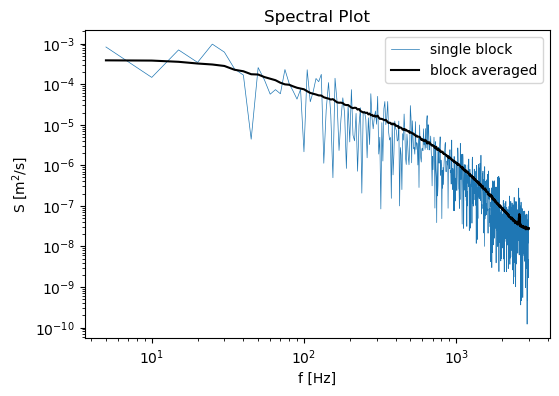

In [ ]:
plt.figure(figsize=figure_size)
f = np.arange(n) / (n * dt)
spectrum_blocks = np.zeros((n, nblock))
for i in range(nblock):
    uft = dt * fft(uf[:,i])
    s = uft * uft.conjugate() / (n * dt)
    spectrum_blocks[:,i] = s.real
spectrum = spectrum_blocks.mean(1)
plt.loglog(f[1:n//2], spectrum_blocks[1:n//2,0], linewidth=0.5, label='single block')
plt.loglog(f[1:n//2], spectrum[1:n//2], '-k', label='block averaged')
plt.xlabel('f [Hz]')
plt.ylabel(u'S [m$^2$/s]')
plt.title('Spectral Plot')
plt.legend()
plt.show()